In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [20]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


scaler = StandardScaler()
X = scaler.fit_transform(X)

# this is just to show the data visually
cancer_copy = load_breast_cancer(as_frame=True)
x_copy = cancer_copy.data
x_copy.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


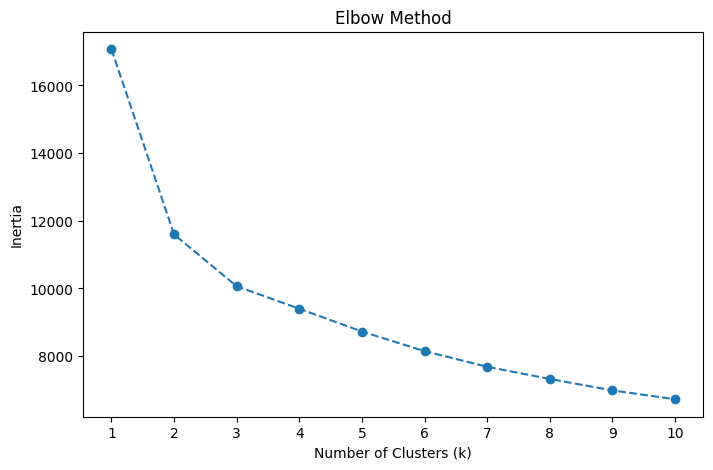

In [21]:

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

Accuracy: 0.88
(ARI): 0.53


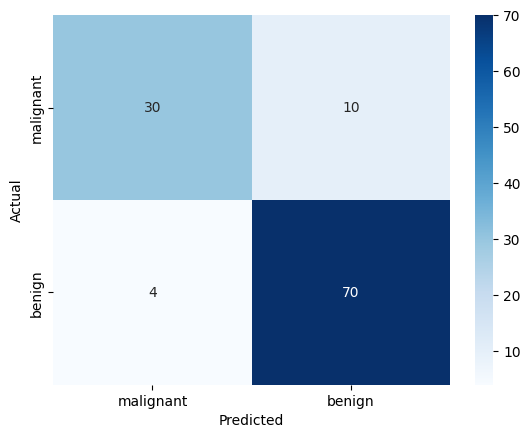

In [23]:

# Map cluster labels to match true labels
labels = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask])[0]

accuracy = accuracy_score(y_test, labels)
ari = adjusted_rand_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")


conf_matrix = confusion_matrix(y_test, labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



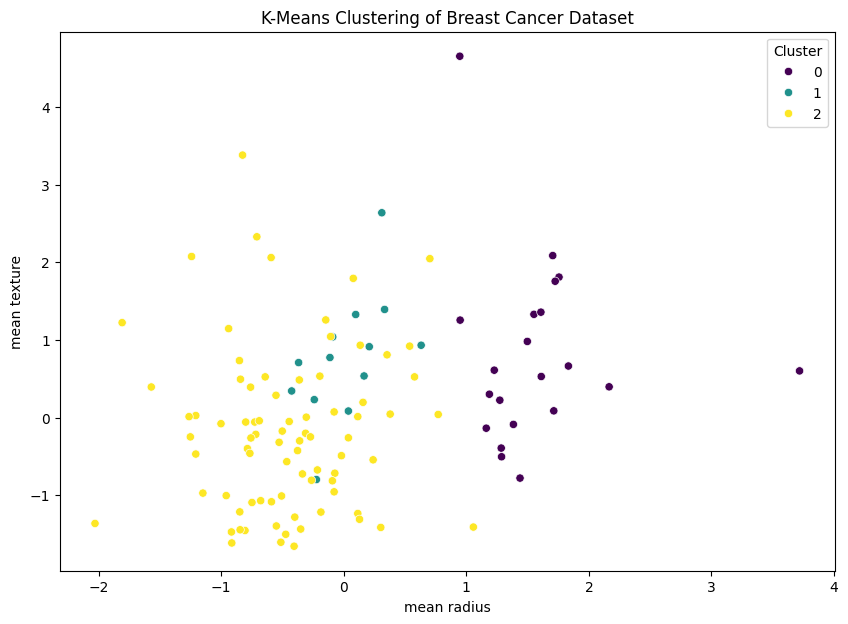

In [24]:
df_test = pd.DataFrame(X_test, columns=cancer.feature_names)
df_test['Cluster'] = y_pred

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_test.iloc[:, 0], y=df_test.iloc[:, 1], hue='Cluster', palette='viridis', data=df_test, legend='full')
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()